In [26]:
#This is a an implementation of clustering with spectral regularization.

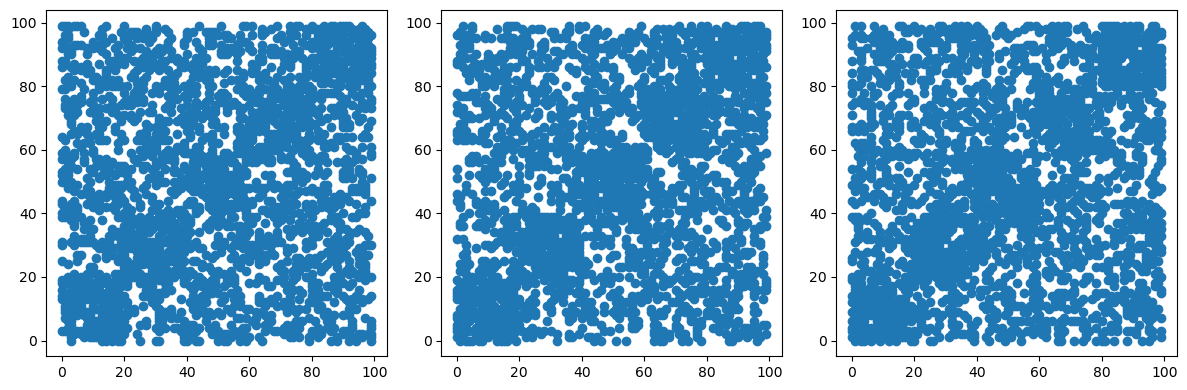

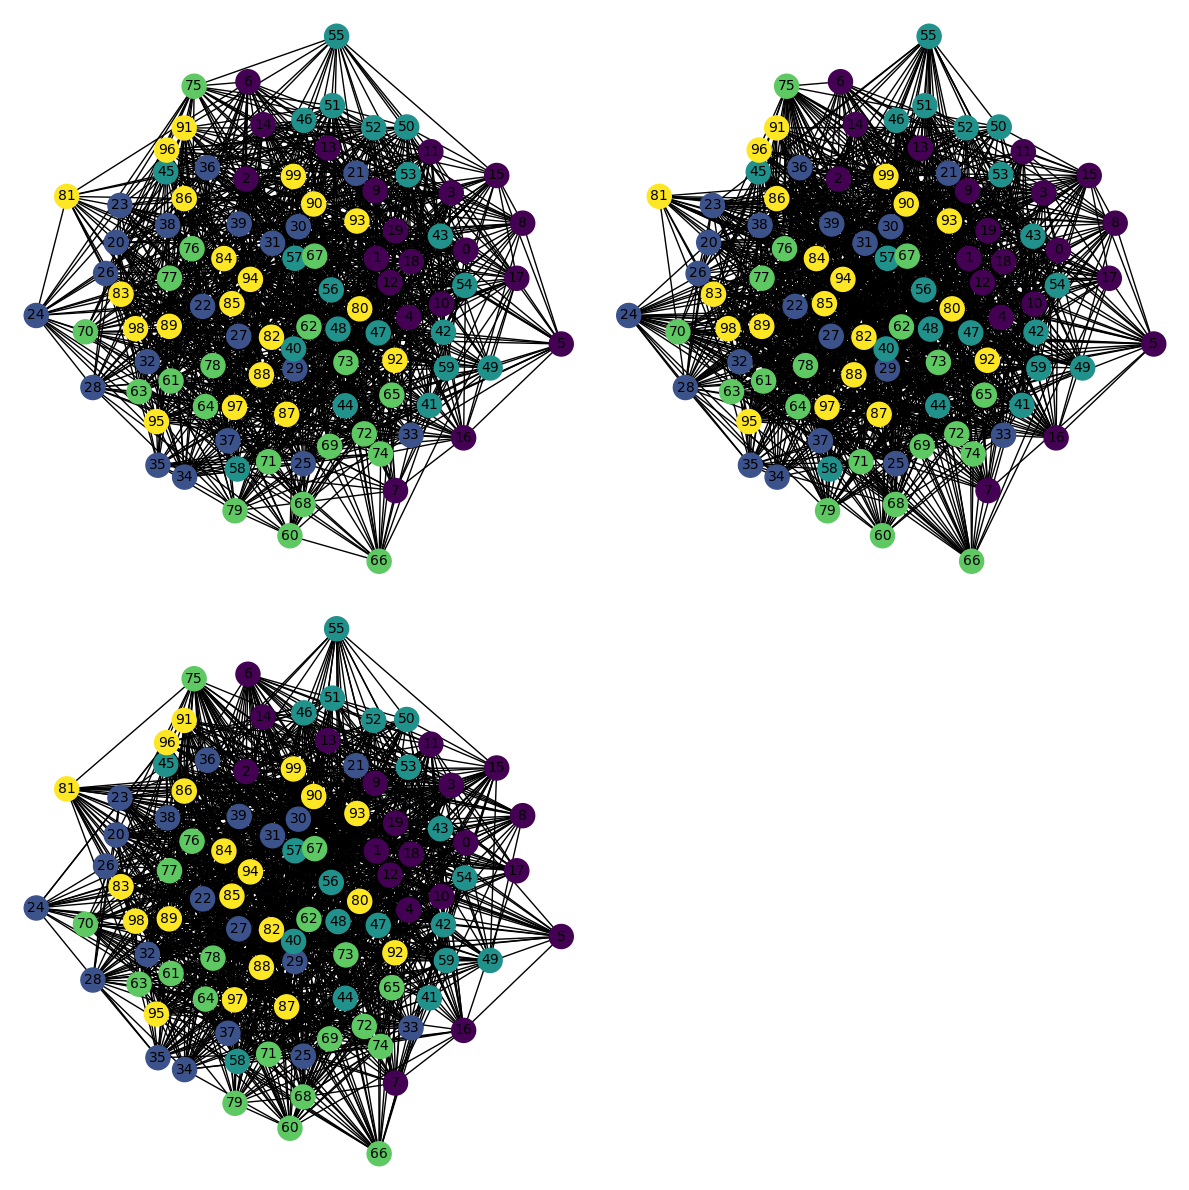

In [27]:
import numpy as np
from sklearn.cluster import KMeans
import warnings
from utils import *
%run GraphCreation.ipynb
warnings.filterwarnings("ignore")

[]

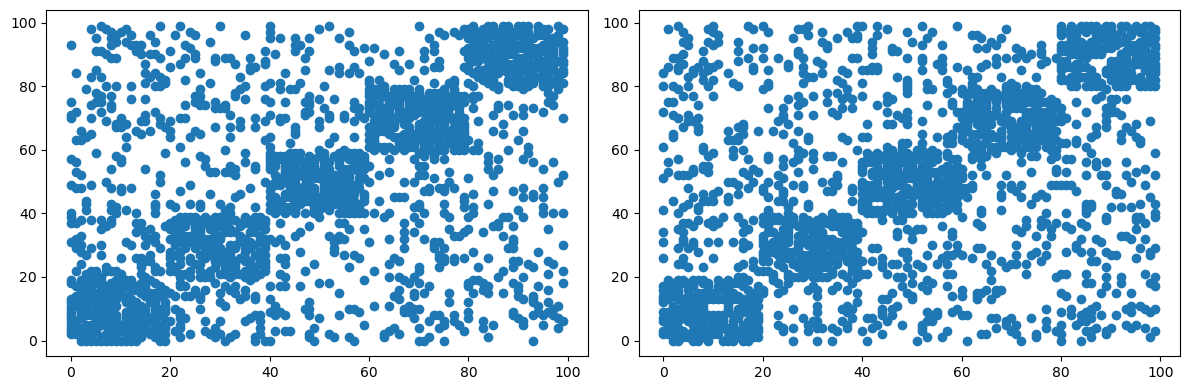

In [28]:
n = 100
M = 2
k = 5

prob = np.full((k,M),0.6)
prob_prime = np.full((k,k,M),0.1)
clusters_size = k*[20]

matrix,index_cluster = graph_creation_1(n,M,k,clusters_size,prob,prob_prime)

fig, axs = plt.subplots(1, M, figsize=(12, 4))  # 1 row, 3 columns, total figure size is (15, 5) inches

for i in range(M):
  x,y = np.where(matrix[:,:,i] == 1)
  axs[i].scatter(x,y)

plt.tight_layout()
plt.plot()

[]

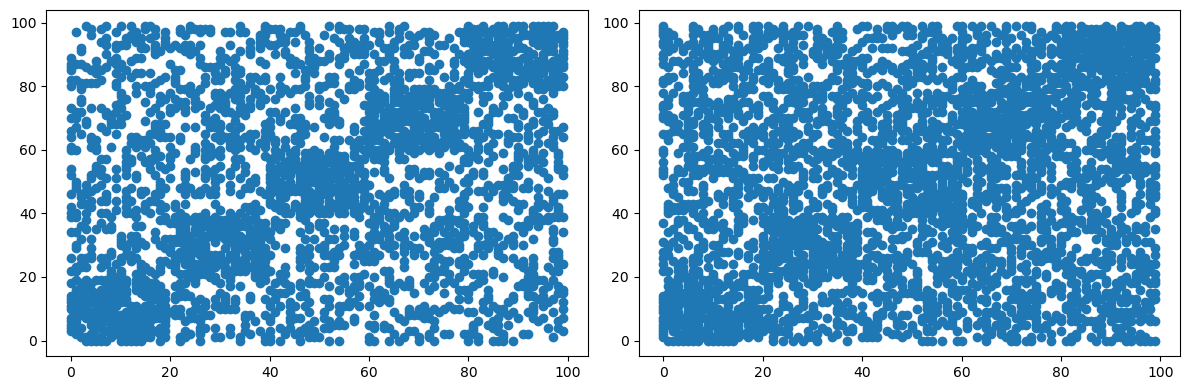

In [33]:
n = 100
M = 2
k = 5

prob = np.full((k,M),0.6)

prob_prime1 = np.full((k,k),0.2)
prob_prime2 = np.full((k,k),0.3)


prob_prime = np.stack((prob_prime1,prob_prime2),axis=2)
clusters_size = k*[20]

matrix,index_cluster = graph_creation_1(n,M,k,clusters_size,prob,prob_prime)

fig, axs = plt.subplots(1, M, figsize=(12, 4))  # 1 row, 3 columns, total figure size is (15, 5) inches

for i in range(M):
  x,y = np.where(matrix[:,:,i] == 1)
  axs[i].scatter(x,y)

plt.tight_layout()
plt.plot()

In [29]:
def k_means_cluster(U,k):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(U)
  return kmeans.labels_

In [30]:
def spectral_clustering(W,k):
  lam = 1
  mu = 1/lam
  n = W.shape[1]
  D = computeDegreeMatrix(W[:, :, 0])
  L = np.linalg.inv(D)@(D-W[:, :, 0])
  eigenvalues,eigenvectors = np.linalg.eig(L)
  indexes = np.argsort(eigenvalues)[0:k]
  U = eigenvectors[:,indexes]
  U_prime = np.zeros(U.shape)
  D_2 = computeDegreeMatrix(W[:, :, 1])
  L_sym_2 = np.linalg.inv(np.sqrt(D_2))@(D_2-W[: ,:, 1])@np.linalg.inv(np.sqrt(D_2))
  for i in range(1,k):
    f = mu*np.linalg.inv((L_sym_2 + mu*np.identity(n)))@U[:,i]
    U_prime[:,i] = f
  return k_means_cluster(U_prime,k)


In [34]:
print(spectral_clustering(matrix,5))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 4
 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
